# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

## Problems

Buatlah model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.

Nama. : Adnan Rio

Batch : FTDS-014

Dataset : Transportasi Uber dan Lyft di Boston,MT 

## Objective : 

- Mampu memahami konsep regression dengan Linear Regression.
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression.
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi.

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Load Dataset 

data = pd.read_csv('h8dsft_P1GC1_Set_1_adnan_rio.csv')
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [3]:
# Duplicate Dataset

data_copy = data.copy()

In [4]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Mengecek tipe data dari setiap kolom yang ada di dataset dan jumlah data non null

In [5]:
# Check Dataset - 2

data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Text(0.5, 1.0, 'surge_multiplier vs price')

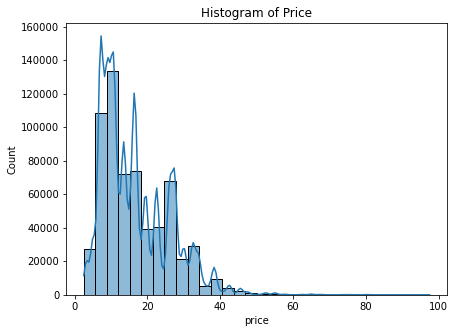

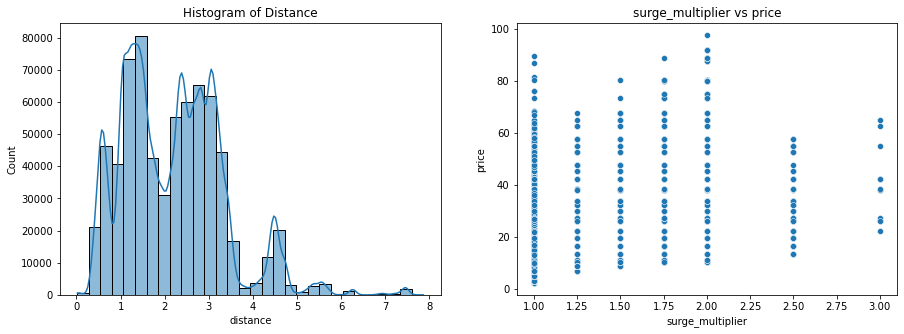

In [6]:
# Create Histogram and Scatter Plot 

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Histogram of Price')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['distance'], bins=30, kde=True)
plt.title('Histogram of Distance')

plt.subplot(1, 2, 2)
sns.scatterplot(x='surge_multiplier', y='price', data=data_copy)
plt.title('surge_multiplier vs price')

Untuk melihat persebaran data pada kolom price, distance serta peresbaran surge_muliplier

In [7]:
data.groupby('cab_type').mean()['price'].sort_values(ascending=False)

cab_type
Lyft    17.351396
Uber    15.795343
Name: price, dtype: float64

Mean untuk price setiap cab_type yang ada di boston

In [8]:
data.corr().sort_values('price',ascending=False, key=abs).index

Index(['price', 'distance', 'surge_multiplier', 'latitude', 'moonPhase',
       'visibility.1', 'visibility', 'longitude', 'windBearing', 'humidity',
       'windGust', 'precipIntensityMax', 'windSpeed', 'month', 'cloudCover',
       'pressure', 'windGustTime', 'apparentTemperatureLow',
       'apparentTemperatureMinTime', 'timestamp', 'temperatureMinTime',
       'temperatureMaxTime', 'uvIndexTime', 'apparentTemperatureLowTime',
       'sunsetTime', 'sunriseTime', 'temperatureHighTime',
       'temperatureLowTime', 'apparentTemperatureMaxTime',
       'apparentTemperatureHighTime', 'day', 'dewPoint',
       'apparentTemperatureMin', 'hour', 'temperatureMax', 'temperatureHigh',
       'ozone', 'temperatureMin', 'uvIndex', 'apparentTemperatureMax',
       'apparentTemperatureHigh', 'precipProbability', 'apparentTemperature',
       'temperatureLow', 'precipIntensity', 'temperature'],
      dtype='object')

Melihat kolom mana saja yang berkorlasi dengan kolom price dengan urutan price, distance, surge_multuplier, latitude, moonPhase dan seterusnya. Untuk korelasi antar kolom kita tidak mengunakan subplot heatmap karena campuran Numeric dan Category. Sehingga tidak menvisualisai secara tepat korelasi antar kolom yang dimana plot heatmap lebih tepat untuk visualisasi data numeric

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

#### Cek kolom yang sangat terkorelasi

Sort ini digunakan karena teralu banyak kolom, setelah di cek melalui data.corr() dan plot heatmap diketahui kolom dibawah ini yang sangat terkorelasi dengan kolom price agar optimal dan efisiensi proses dalam problem yang ingin kita solve

In [9]:
kolrel= ['price', 'distance', 'surge_multiplier', 'moonPhase', 'visibility', 'name', 'cab_type']
data_rel = data[kolrel]
data_rel.head()

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,5.0,0.44,1.0,0.30,10.000,Shared,Lyft
1,11.0,0.44,1.0,0.64,4.786,Lux,Lyft
2,7.0,0.44,1.0,0.68,10.000,Lyft,Lyft
3,26.0,0.44,1.0,0.75,10.000,Lux Black XL,Lyft
4,9.0,0.44,1.0,0.72,10.000,Lyft XL,Lyft


#### Cek missing value kolom yang sangat terkorelasi

Sort ini digunakan karena teralu banyak kolom, setelah di cek melalui data.corr() dan plot heatmap diketahui kolom dibawah ini yang sangat terkorelasi dengan kolom price agar optimal dan efisiensi proses dalam problem yang ingin kita solve

In [10]:
data_rel.isnull().sum() # Cek ada nilai null atau tidak pada sort kolom 

price               55095
distance                0
surge_multiplier        0
moonPhase               0
visibility              0
name                    0
cab_type                0
dtype: int64

#### Cek tipe data pada setiap kolom yang sangat terkorelasi

Sort ini digunakan karena teralu banyak kolom, setelah di cek melalui data.corr() dan plot heatmap diketahui kolom dibawah ini yang sangat terkorelasi dengan kolom price agar optimal dan efisiensi proses dalam problem yang ingin kita solve

In [11]:
data_rel.info() # Cek tipe data pada yang telah saya sort kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             637976 non-null  float64
 1   distance          693071 non-null  float64
 2   surge_multiplier  693071 non-null  float64
 3   moonPhase         693071 non-null  float64
 4   visibility        693071 non-null  float64
 5   name              693071 non-null  object 
 6   cab_type          693071 non-null  object 
dtypes: float64(5), object(2)
memory usage: 37.0+ MB


### Get Data for Model Inference

In [12]:
# Get Data for Model Inference
## Mengambil data sejumlah 10 secara random 

data_inf = data_rel.sample(10, random_state=20)
data_inf

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type
668305,7.0,3.05,1.00,0.33,3.606,Shared,Lyft
280573,13.5,4.22,1.00,0.37,10.000,Lyft,Lyft
539953,7.5,1.57,1.00,0.79,9.920,UberPool,Uber
332095,13.5,1.04,1.00,0.89,1.413,Lux,Lyft
167331,26.0,0.61,1.00,0.79,9.928,Lux Black XL,Lyft
321397,26.0,0.72,1.00,0.72,10.000,Black SUV,Uber
646337,7.0,1.56,1.00,0.64,4.273,Lyft,Lyft
245379,13.5,1.12,1.25,0.86,1.348,Lyft XL,Lyft
89662,7.0,2.46,1.00,0.72,9.996,Shared,Lyft
231176,9.5,1.34,1.00,0.30,2.994,UberX,Uber


In [13]:
# Remove Inference-Set from Dataset
## Memasukan 10 data sebelumnya ke dalam variable data_train_test

data_train_test = data_rel.drop(data_inf.index)
data_train_test

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,5.0,0.44,1.0,0.30,10.000,Shared,Lyft
1,11.0,0.44,1.0,0.64,4.786,Lux,Lyft
2,7.0,0.44,1.0,0.68,10.000,Lyft,Lyft
3,26.0,0.44,1.0,0.75,10.000,Lux Black XL,Lyft
4,9.0,0.44,1.0,0.72,10.000,Lyft XL,Lyft
...,...,...,...,...,...,...,...
693066,13.0,1.00,1.0,0.82,9.785,UberXL,Uber
693067,9.5,1.00,1.0,0.82,9.785,UberX,Uber
693068,NaN,1.00,1.0,0.82,9.785,Taxi,Uber
693069,27.0,1.00,1.0,0.82,9.785,Black SUV,Uber


In [14]:
# Reset Index 
# Mereset kedua variabel

data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)
data_inf

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,7.0,3.05,1.00,0.33,3.606,Shared,Lyft
1,13.5,4.22,1.00,0.37,10.000,Lyft,Lyft
2,7.5,1.57,1.00,0.79,9.920,UberPool,Uber
3,13.5,1.04,1.00,0.89,1.413,Lux,Lyft
4,26.0,0.61,1.00,0.79,9.928,Lux Black XL,Lyft
5,26.0,0.72,1.00,0.72,10.000,Black SUV,Uber
6,7.0,1.56,1.00,0.64,4.273,Lyft,Lyft
7,13.5,1.12,1.25,0.86,1.348,Lyft XL,Lyft
8,7.0,2.46,1.00,0.72,9.996,Shared,Lyft
9,9.5,1.34,1.00,0.30,2.994,UberX,Uber


### Splitting between `X` (Features) and `y` (Target)

In [15]:
# Split between `X` (Features) and `y` (Target)
# Memisahkan data fitur dan data data target uuntuk permodelan

X = data_train_test.drop('price', axis=1) 
y = data_train_test['price']
X

,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,0.44,1.0,0.30,10.000,Shared,Lyft
1,0.44,1.0,0.64,4.786,Lux,Lyft
2,0.44,1.0,0.68,10.000,Lyft,Lyft
3,0.44,1.0,0.75,10.000,Lux Black XL,Lyft
4,0.44,1.0,0.72,10.000,Lyft XL,Lyft
...,...,...,...,...,...,...
693056,1.00,1.0,0.82,9.785,UberXL,Uber
693057,1.00,1.0,0.82,9.785,UberX,Uber
693058,1.00,1.0,0.82,9.785,Taxi,Uber
693059,1.00,1.0,0.82,9.785,Black SUV,Uber


In [16]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_test.shape)
print('y_train Size =', y_train.shape)
print('y_test Size  =', y_test.shape)

X_Train Size :  (554448, 6)
X_Test Size  :  (138613, 6)
y_train Size = (554448,)
y_test Size  = (138613,)


In [17]:
X_train  # Data train yang akan menjadi model dan data test untuk mengetes model

,distance,surge_multiplier,moonPhase,visibility,name,cab_type
190502,3.01,1.0,0.64,8.677,Lux Black XL,Lyft
119148,2.65,1.0,0.79,9.966,Lux Black XL,Lyft
603648,3.20,1.0,0.79,10.000,UberXL,Uber
269185,2.66,1.0,0.68,9.961,Black SUV,Uber
632624,2.88,1.0,0.79,9.944,UberXL,Uber
...,...,...,...,...,...,...
516374,3.04,1.0,0.09,9.972,UberX,Uber
125680,7.46,1.0,0.37,10.000,UberXL,Uber
491926,1.03,1.0,0.68,3.522,Lux,Lyft
297103,1.69,1.0,0.89,3.729,Lux Black,Lyft


In [18]:
y_train # Data train yang akan menjadi model dan data test untuk mengetes model

190502    38.5
119148    34.0
603648    25.0
269185    28.5
632624    16.0
          ... 
516374     9.5
125680    28.5
491926    10.5
297103    22.5
589041    10.0
Name: price, Length: 554448, dtype: float64

Data X (fitur) dan y (target) akan dipisah menjadi data train untuk menjadi model dan data test untuk mengetest model

## Handling Outlier

### Jika ada Outlier

In [19]:
X_train.describe() # Cek Centreal tendency dari X_train

,distance,surge_multiplier,moonPhase,visibility
count,554448.000000,554448.000000,554448.000000,554448.000000
mean,2.189183,1.013867,0.579115,8.465371
std,1.138943,0.091692,0.244618,2.605015
min,0.020000,1.000000,0.090000,0.717000
25%,1.280000,1.000000,0.300000,8.432000
50%,2.160000,1.000000,0.680000,9.878000
75%,2.920000,1.000000,0.790000,9.996000
max,7.860000,3.000000,0.930000,10.000000


In [20]:
X_train['surge_multiplier'].unique()

array([1.  , 1.5 , 2.  , 1.25, 1.75, 2.5 , 3.  ])

c:\Users\SBD-HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\SBD-HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\SBD-HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'visibility')

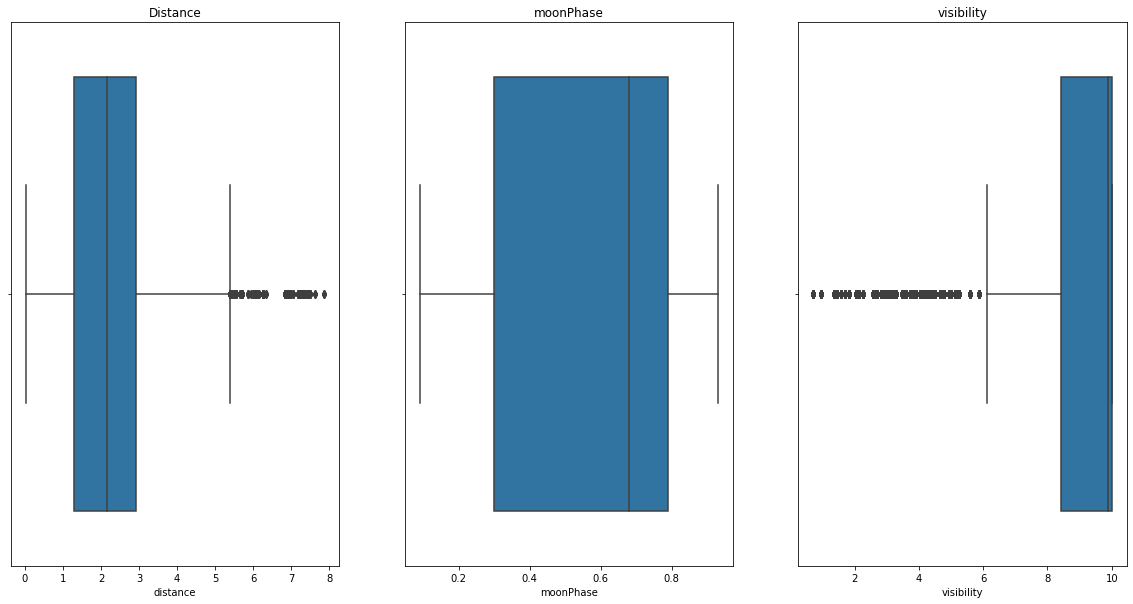

In [21]:
fig = plt.figure(figsize=(20,10))
row = 1
col = 3

# figure, axis = plt.subplots(2,2)
fig.add_subplot(row, col, 1)
sns.boxplot(X_train['distance'])
plt.title('Distance')

fig.add_subplot(row, col, 2)
# plt.subplot(1,2,1)
sns.boxplot(X_train['moonPhase'])
plt.title('moonPhase')

fig.add_subplot(row, col, 3)
# plt.subplot(1,2,1)
sns.boxplot(X_train['visibility'])
plt.title('visibility')

Boxplot untuk mengetahui outlier pada masing masing kolom

In [22]:
print('y_train skewness =\n',X_train.skew()) # Cek skew pada X_train
print('X_test skewness =\n',X_test.skew()) # Cek skew pada X_test

y_train skewness =
 distance            0.832676
surge_multiplier    8.335347
moonPhase          -0.379752
visibility         -1.504829
dtype: float64
X_test skewness =
 distance            0.841277
surge_multiplier    8.259588
moonPhase          -0.378771
visibility         -1.516239
dtype: float64


C:\Users\SBD-HP\AppData\Local\Temp\ipykernel_13880\2798605321.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('y_train skewness =\n',X_train.skew()) # Cek skew pada X_train
C:\Users\SBD-HP\AppData\Local\Temp\ipykernel_13880\2798605321.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('X_test skewness =\n',X_test.skew()) # Cek skew pada X_test


Untuk nilai visibility dan distance sedikit skewed

In [23]:
print(X_train['distance'].quantile([0.25, 0.5, 0.75]))
print(X_train['moonPhase'].quantile([0.25, 0.5, 0.75]))
print(X_train['visibility'].quantile([0.25, 0.5, 0.75]))

0.25    1.28
0.50    2.16
0.75    2.92
Name: distance, dtype: float64
0.25    0.30
0.50    0.68
0.75    0.79
Name: moonPhase, dtype: float64
0.25    8.432
0.50    9.878
0.75    9.996
Name: visibility, dtype: float64


Match proses q1 q2 q3 untuk masing-masing kolom

In [24]:
q1distance       = 1.28
q3distance       = 2.92
q1moonPhase      = 0.30
q3moonPhase      = 0.79
q1visibility     = 8.432
q3visibility     = 9.996
iqrdistance      = q3distance-q1distance
iqrmoonPhase     = q3moonPhase - q1moonPhase
iqrvisibility    = q3visibility - q1visibility
minimumdistance  = q1distance - (1.5*iqrdistance)
maximumdistance  = q3distance + (1.5*iqrdistance)
minimummoon      = q1moonPhase - (1.5*iqrmoonPhase)
maximummoon      = q3moonPhase + (1.5*iqrmoonPhase)
minimumvisi      = q1visibility - (1.5*iqrvisibility)
maximumvisi      = q3visibility + (1.5*iqrvisibility)
print("Batas Minimum Outlier X_train distance =", minimumdistance)
print("Batas Maximum Outlier X_train distance =", maximumdistance)
print("Batas Minimum Outlier X_train moonPhase =", minimummoon)
print("Batas Maximum Outlier X_train moonPhase =", maximummoon)
print("Batas Minimum Outlier X_train visibility =", minimumvisi)
print("Batas Maximum Outlier X_train visibility =", maximumvisi)

Batas Minimum Outlier X_train distance = -1.18
Batas Maximum Outlier X_train distance = 5.38
Batas Minimum Outlier X_train moonPhase = -0.4350000000000001
Batas Maximum Outlier X_train moonPhase = 1.5250000000000001
Batas Minimum Outlier X_train visibility = 6.086
Batas Maximum Outlier X_train visibility = 12.342


In [25]:
# Handle outlier menggunakan winsorizing

X_train.loc[X_train['distance']>=maximumdistance, 'distance'] = maximumdistance
X_train.loc[X_train['distance']<=minimumdistance, 'distance'] = minimumdistance

X_train.loc[X_train['moonPhase']>=maximummoon, 'moonPhase'] = maximummoon
X_train.loc[X_train['moonPhase']<=minimummoon, 'moonPhase'] = minimummoon

X_train.loc[X_train['visibility']>=maximumvisi, 'visibility'] = maximumvisi
X_train.loc[X_train['visibility']<=minimumvisi, 'visibility'] = minimumvisi

Nilai outliers dijadikan maksimal dan minimum dari setiap kolom yang telah disort agar mempertahankan shape X_train untuk permodelan selanjutnya

In [26]:
np.where(X_train['distance']>maximumdistance) # cek outlier melaui dengan output array

(array([], dtype=int64),)

#### Jika tanpa Outlier

Setelah cek dataframe describe() nilai outlier telah dihandle menggunakan metode winsorizing

In [27]:
X_train.describe() # Cek handle outlier dengan metode winsorizing

,distance,surge_multiplier,moonPhase,visibility
count,554448.000000,554448.000000,554448.000000,554448.000000
mean,2.179292,1.013867,0.579115,8.984987
std,1.103751,0.091692,0.244618,1.558123
min,0.020000,1.000000,0.090000,6.086000
25%,1.280000,1.000000,0.300000,8.432000
50%,2.160000,1.000000,0.680000,9.878000
75%,2.920000,1.000000,0.790000,9.996000
max,5.380000,3.000000,0.930000,10.000000


c:\Users\SBD-HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\SBD-HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\SBD-HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'visibility')

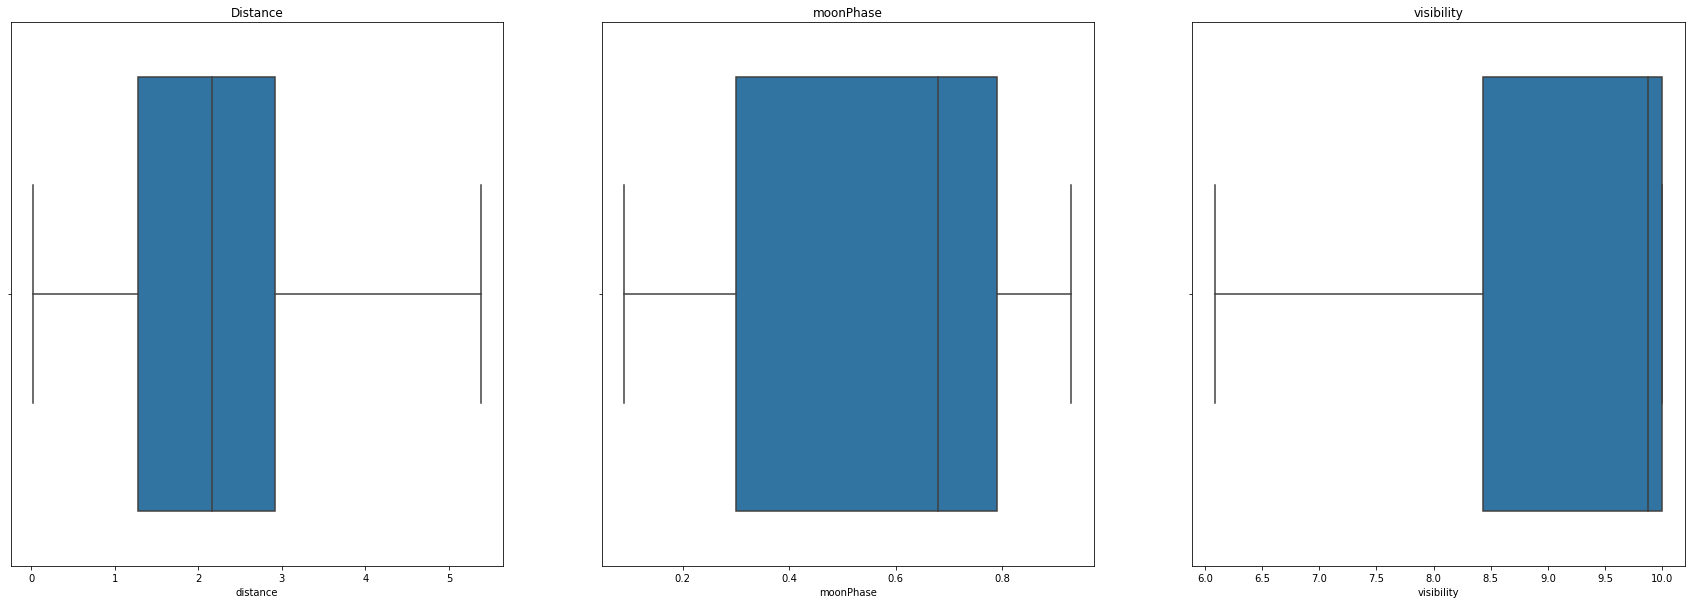

In [28]:
fig = plt.figure(figsize=(30,10))
row = 1
col = 3

# figure, axis = plt.subplots(2,2)
fig.add_subplot(row, col, 1)
sns.boxplot(X_train['distance'])
plt.title('Distance')

fig.add_subplot(row, col, 2)
# plt.subplot(1,2,1)
sns.boxplot(X_train['moonPhase'])
plt.title('moonPhase')

fig.add_subplot(row, col, 3)
# plt.subplot(1,2,1)
sns.boxplot(X_train['visibility'])
plt.title('visibility')

Boxplot untuk cek outlier pada masing masing kolom masih ada atau tidak

In [29]:
y_test.quantile([0.25, 0.5, 0.75])

0.25     9.0
0.50    13.5
0.75    22.5
Name: price, dtype: float64

In [30]:
q1 = 9.0
q3 = 22.5
iqr = q3-q1
minimum = q1 - (1.5*iqr)
maximum = q3 + (1.5*iqr)
print("Batas Minimum Outlier y_test =", minimum)
print("Batas Maximum Outlier y_test =", maximum)

Batas Minimum Outlier y_test = -11.25
Batas Maximum Outlier y_test = 42.75


Math proc q1 q2 q3 dari y_test

c:\Users\SBD-HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\SBD-HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'y_test')

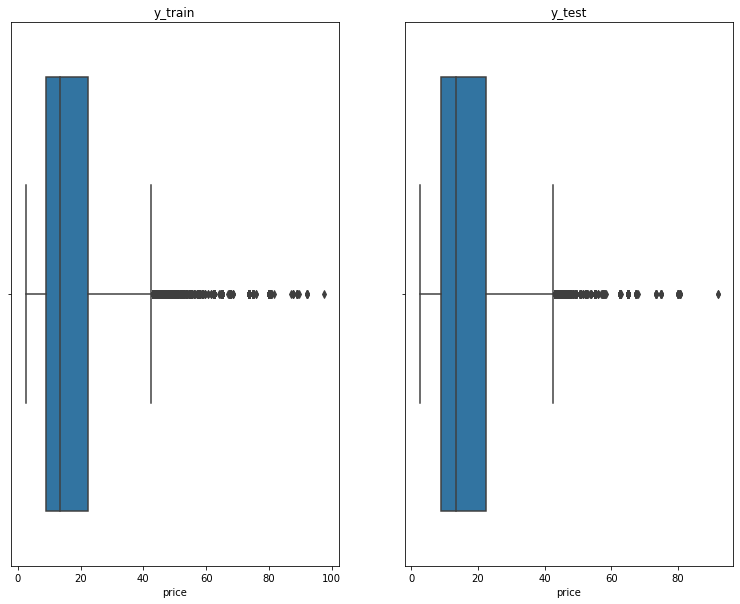

In [31]:
fig = plt.figure(figsize=(20,10))
row = 1
col = 3

fig.add_subplot(row, col, 1)
sns.boxplot(y_train)
plt.title('y_train')

fig.add_subplot(row, col, 2)
sns.boxplot(y_test)
plt.title('y_test')

Text(0.5, 1.0, 'y_test')

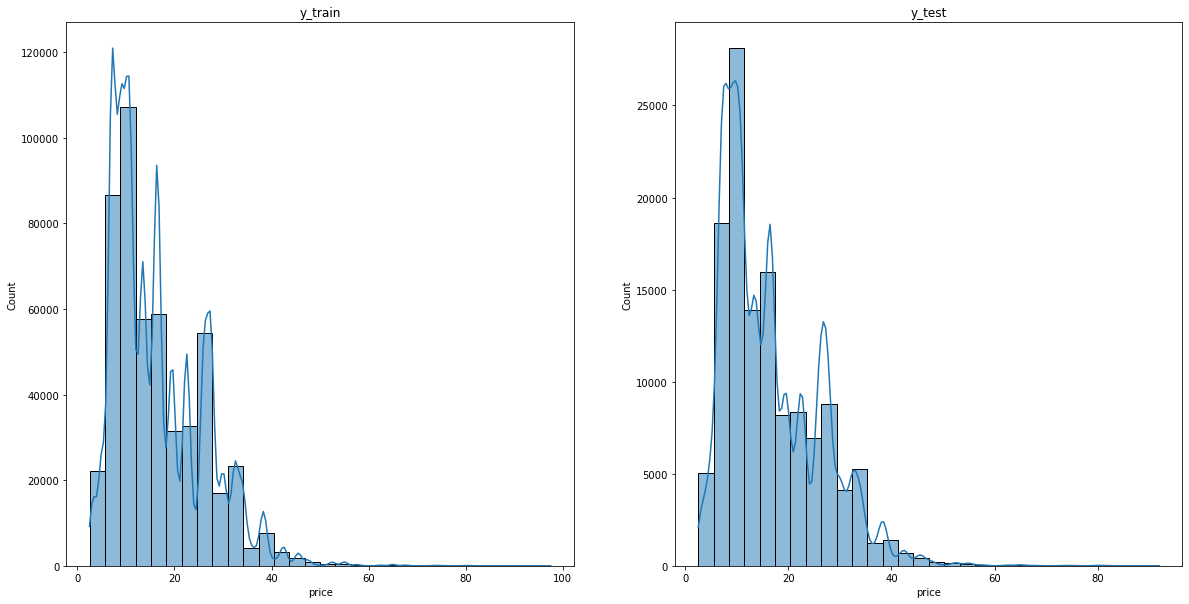

In [32]:
fig = plt.figure(figsize=(20,10))
row = 1
col = 2

fig.add_subplot(row, col, 1)
# plt.subplot(1,2,1)
sns.histplot(y_train, bins=30, kde=True)
plt.title('y_train')

fig.add_subplot(row, col, 2)
# plt.subplot(1,2,1)
sns.histplot(y_test, bins=30, kde=True)
plt.title('y_test')

Distribusi data right skew

In [33]:
print('y_train skewness =',y_train.skew())
print('y_test skewness =',y_test.skew())

y_train skewness = 1.0451761578979797
y_test skewness = 1.04802578317619


Nilai > 0 terbukti right skew

In [34]:
y_train.quantile([0.25, 0.5, 0.75])

0.25     9.0
0.50    13.5
0.75    22.5
Name: price, dtype: float64

In [35]:
q1 = 9.0
q3 = 22.5
iqr = q3-q1
minimum = q1 - (1.5*iqr)
maximum = q3 + (1.5*iqr)
print("Batas Minimum Outlier y_train =", minimum)
print("Batas Maximum Outlier y_train =", maximum)

Batas Minimum Outlier y_train = -11.25
Batas Maximum Outlier y_train = 42.75


Math proc q1 q2 q3 dari y_train

In [36]:
# Handle outlier menggunakan winsorizing

y_train.loc[y_train>=maximum] = maximum
y_train.loc[y_train<=minimum] = minimum
y_test.loc[y_test>=maximum] = maximum
y_test.loc[y_test<=minimum] = minimum

Nilai outliers dijadikan maksimal dan minimum dari setiap kolom yang telah disort agar mempertahankan shape X_train untuk permodelan selanjutnya

In [37]:
print('X_train Size =', X_train.shape)
print('X_test Size  =', X_test.shape)
print('y_train Size =', y_train.shape)
print('y_test Size  =', y_test.shape)

X_train Size = (554448, 6)
X_test Size  = (138613, 6)
y_train Size = (554448,)
y_test Size  = (138613,)


Shape Train Test set masih sama setelah Handling Outliers

### Handling Missing Values

In [38]:
# Check Missing Values in `X_train`

X_train.isnull().sum()

distance            0
surge_multiplier    0
moonPhase           0
visibility          0
name                0
cab_type            0
dtype: int64

In [39]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

distance            0
surge_multiplier    0
moonPhase           0
visibility          0
name                0
cab_type            0
dtype: int64

In [40]:
# Check Missing Values in `y_train`

y_train.isnull().sum()

44016

Cek nilai null pada y_train terdapat 44016

In [41]:
# Check Missing Values in `y_test`

y_test.isnull().sum()

11079

Cek nilai null pada y_train terdapat 11079

Handle missing value ini akan menggunakan metode Missing Completely at Random (MCAR), y_train dan y_test tidak terdistribusi normal(right skewed) maka akan menggunakan nilai median untuk mengisi nilai null.

In [42]:
print('y_train median :', y_train.median())
print('y_train mean   :', y_train.mean())

print('y_test median :', y_train.median())
print('y_test mean   :', y_train.mean())

y_train median : 13.5
y_train mean   : 16.480981560717193
y_test median : 13.5
y_test mean   : 16.480981560717193


Menghitung nilai mean dan median pada y_train dan y_test

In [43]:
y_train = y_train.fillna(y_train.median())
y_test  = y_test.fillna(y_test.median())

Handle missing value

In [44]:
# Handle missing value

print('y_train NaN =',y_train.isnull().sum())
print('y_test NaN  =',y_test.isnull().sum())

y_train NaN = 0
y_test NaN  = 0


In [45]:
X_train.info() # Cek sudah tidak ada nilai missing value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554448 entries, 190502 to 589041
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          554448 non-null  float64
 1   surge_multiplier  554448 non-null  float64
 2   moonPhase         554448 non-null  float64
 3   visibility        554448 non-null  float64
 4   name              554448 non-null  object 
 5   cab_type          554448 non-null  object 
dtypes: float64(4), object(2)
memory usage: 29.6+ MB


## Feature Selection

Feature Selection dilakukan sebelum data preprocessing untuk mempersempit cakupan preprocessing data sehingga dapat mengurangi waktu pengolahan data dan menghindari mengolah data yang pada akhirnya tidak terpakai.

### Split between Numerical Columns and Categorical Columns

In [46]:
# Get Numerical Columns and Categorical Columns

num_kolom = X_train.select_dtypes(include=np.number).columns.tolist()
cat_kolom = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_kolom)
print('Categorical Columns : ', cat_kolom)

Numerical Columns :  ['distance', 'surge_multiplier', 'moonPhase', 'visibility']
Categorical Columns :  ['name', 'cab_type']


Memisahkan data numerical dan categorical

In [47]:
# Split Train-Set and Test-Set based on Column Types 

X_train_num = X_train[num_kolom]
X_train_cat = X_train[cat_kolom]

X_test_num = X_test[num_kolom]
X_test_cat = X_test[cat_kolom]

X_train_cat

,name,cab_type
190502,Lux Black XL,Lyft
119148,Lux Black XL,Lyft
603648,UberXL,Uber
269185,Black SUV,Uber
632624,UberXL,Uber
...,...,...
516374,UberX,Uber
125680,UberXL,Uber
491926,Lux,Lyft
297103,Lux Black,Lyft


### Feature Scaling

x_train_num harus di scaling , agar tidak melihat data kolom dengan nilai paling besar saja. semua besaran indeks dari puluhan, ratusan dan jutaanya menjadi setara.

In [48]:
X_train_num

,distance,surge_multiplier,moonPhase,visibility
190502,3.01,1.0,0.64,8.677
119148,2.65,1.0,0.79,9.966
603648,3.20,1.0,0.79,10.000
269185,2.66,1.0,0.68,9.961
632624,2.88,1.0,0.79,9.944
...,...,...,...,...
516374,3.04,1.0,0.09,9.972
125680,5.38,1.0,0.37,10.000
491926,1.03,1.0,0.68,6.086
297103,1.69,1.0,0.89,6.086


In [49]:
X_train_num.skew()

distance            0.583470
surge_multiplier    8.335347
moonPhase          -0.379752
visibility         -1.205732
dtype: float64

Data tergolong skewed walaupun tidak terlalu besar nilainya.

In [50]:
# Feature Scaling using MinMaxScaler 

scaler = MinMaxScaler() # # Nilainya di ubah skalanya menjadi 0 sampai 1
scaler.fit(X_train_num) # .fit itu proses tranning untuk mencari kolom yang akan di ubah scaler nya, .fit hanya di gunakan untuk X_train dan tidak untuk X_test
                        # fit itu proses pencarian batas 0 dan batas 1
                        
X_train_num_scaled = scaler.transform(X_train_num) #setelah di lakukan scaler baru di transform/mengubah nilainya menjadi 0 sampai 1
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.55783582, 0.        , 0.6547619 , 0.66198263],
       [0.49067164, 0.        , 0.83333333, 0.99131323],
       [0.59328358, 0.        , 0.83333333, 1.        ],
       ...,
       [0.18843284, 0.        , 0.70238095, 0.        ],
       [0.31156716, 0.        , 0.95238095, 0.        ],
       [0.36380597, 0.        , 0.75      , 0.98058252]])

### Feature Encoding

Feature encoding proses pengubahan suatu data berupa kategorik yang akan diubah menjadi bentuknya menjadi numerik/angka, karena dalam meachine learning tidak bisa memproses suatu string . Jadi harus di ubah ke angka, salah satu caranya orgin encoding

In [51]:
# Display X_train_cat

X_train_cat

,name,cab_type
190502,Lux Black XL,Lyft
119148,Lux Black XL,Lyft
603648,UberXL,Uber
269185,Black SUV,Uber
632624,UberXL,Uber
...,...,...
516374,UberX,Uber
125680,UberXL,Uber
491926,Lux,Lyft
297103,Lux Black,Lyft


In [52]:
# Feature Encoding using Ordinal Encoder
# Ordinalencoder karena data ordinal

encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

OrdinalEncoder()

In [53]:
# Data X_train_set menjadi matriks
# Melakukan encoding bagi category ordinal sesuai dengan urutan yang telah ditentukan

X_train_cat_encoded = encoder.transform(X_train_cat) # lakukan transform train berdasarkan fit
X_train_cat_encoded

array([[ 4.,  0.],
       [ 4.,  0.],
       [11.,  1.],
       ...,
       [ 2.,  0.],
       [ 3.,  0.],
       [ 9.,  1.]])

In [54]:
# Data X_test_set menjadi matriks
# Melakukan encoding bagi category ordinal sesuai dengan urutan yang telah ditentukan

X_test_cat_encoded = encoder.transform(X_test_cat)  # lakukan transform test berdasarkan fit
X_test_cat_encoded

array([[12.,  1.],
       [ 7.,  0.],
       [ 8.,  1.],
       ...,
       [ 2.,  0.],
       [10.,  1.],
       [ 3.,  0.]])

### Concate between Numerical Columns and Categorical Columns

In [55]:
# Concate Columns
# Satukan keempat dataset train dan test yang telah melewati proses scaling dan encoding (X_train_num_sc, X_train_cat_encoded)
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[ 0.55783582,  0.        ,  0.6547619 ,  0.66198263,  4.        ,
         0.        ],
       [ 0.49067164,  0.        ,  0.83333333,  0.99131323,  4.        ,
         0.        ],
       [ 0.59328358,  0.        ,  0.83333333,  1.        , 11.        ,
         1.        ],
       ...,
       [ 0.18843284,  0.        ,  0.70238095,  0.        ,  2.        ,
         0.        ],
       [ 0.31156716,  0.        ,  0.95238095,  0.        ,  3.        ,
         0.        ],
       [ 0.36380597,  0.        ,  0.75      ,  0.98058252,  9.        ,
         1.        ]])

Data numerik dan kategorik yang telah diencode digabungkan lagi matriksnya.

In [56]:
# Create DataFrame of `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_kolom+cat_kolom])
X_train_final_df

,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,0.557836,0.0,0.654762,0.661983,4.0,0.0
1,0.490672,0.0,0.833333,0.991313,4.0,0.0
2,0.593284,0.0,0.833333,1.000000,11.0,1.0
3,0.492537,0.0,0.702381,0.990036,1.0,1.0
4,0.533582,0.0,0.833333,0.985692,11.0,1.0
...,...,...,...,...,...,...
554443,0.563433,0.0,0.000000,0.992846,10.0,1.0
554444,1.000000,0.0,0.333333,1.000000,11.0,1.0
554445,0.188433,0.0,0.702381,0.000000,2.0,0.0
554446,0.311567,0.0,0.952381,0.000000,3.0,0.0


Matriks yang sudah digabung diubah menjadi dataframe lagi.

# 6 - Model Definition

Notes : 

1. Algoritma yang dipakai adalah `Linear Regression`. 

2. Metrics yang akan dipakai adalah `Mean Absolute Error (MAE)`.

Model Definition yang saya gunakan adalah linear regresi. Karena Linear Regresi dapat digunakan untuk mengetahui arah dari hubungan antara Target dengan fitur, berdasarkan proses data.corr().sort_values('price',ascending=False, key=abs).index sebelumnya terdapat fitur yang memiliki hubungan positif untuk memprediksi nilai dari variabel target. Berdasarkan hal ini maka saya akan mendefinisikan modelnya berupa linear regresi dan utuk matriks yang digunakan berupa MAE dan R2.

In [57]:
# Training using Linear Regression
# Algoritma yang akan di gunakan untuk memproses data adalah linear regression dan metrics yang digunakan adalah MAE

model_lin_reg = LinearRegression()

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [58]:
# Train the Model

X_train_final.shape

(554448, 6)

In [59]:
y_train.shape

(554448,)

In [60]:
model_lin_reg.fit(X_train_final, y_train) # .fit nya harus X_train_final yang sudah di scalling dan encoding dengan y-train

LinearRegression()

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [61]:
# Predict Train-Set and Test-Set 

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

In [62]:
y_pred_train.shape

(554448,)

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

In [63]:
# Model Evaluation using MAE 

print('MAE Train-Set : ', mean_absolute_error(y_train, y_pred_train))
print('MAE Test-Set  : ', mean_absolute_error(y_test, y_pred_test))
print('')

# Model Evaluation menggunakan MAE
print('r2score Train-Set : ', r2_score(y_train, y_pred_train))
print('r2score Test-Set  : ', r2_score(y_test, y_pred_test))

MAE Train-Set :  4.85772497411483
MAE Test-Set  :  4.848679161113726

r2score Train-Set :  0.5067354034150156
r2score Test-Set  :  0.510095351757546


Nilai MAE train set dan test set menggambarkan seberapa besar eror rata-rata per prediksinya yakni +- 4.9. Kedua train dan test bernilai hampir sama dan memiliki angka yang relatif kecil sehingga dapat ditentukan sebagai Good fit.

Nilai R2 mencerminkan % kesesuaian model yang dibuat dengan keadaan aktual. Model yang di memiliki kemiripan 50% dengan kondisi aktual, perbedaan antara train dan test juga kecil. Sama dengan hasil MAE, model ini ditentukan sebagai Good fit meskipun hanya mengambarkan 50 % dengan kondisi aktual.

# 9 - Model Saving

In [64]:
# Save the Files

import pickle

with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model_encoder.pkl', 'wb') as file_2:
  pickle.dump(encoder, file_2)

with open('model_lin_reg.pkl', 'wb') as file_3:
  pickle.dump(model_lin_reg, file_3)

with open('list_num_kolom.txt', 'w') as file_4:
  file_4.write(str(num_kolom))

with open('list_cat_kolom.txt', 'w') as file_5:
  file_5.write(str(cat_kolom))

# 10 - Model Inference

## Load Model

In [65]:
# Load All Files 

import joblib 
import json

with open('model_scaler.pkl', 'rb') as file_1:  # variabel model_lin_reg akan di dump /save jadi mmodel_scaler.pkl.pkl
   model_scaler = pickle.load(file_1)

with open('model_encoder.pkl', 'rb') as file_2: # variabel scaler akan di dump /save jadi model_encoder.pkl
  model_encoder = pickle.load(file_2)

with open('model_lin_reg.pkl', 'rb') as file_3: # variabel scaler akan di dump /save jadi model_lin_reg.pkl
  model_lin_reg = pickle.load(file_3)

with open('list_num_kolom.txt', 'r') as file_4: # variabel scaler akan di dump /save jadi list_num_kolom.txt
  list_num_columns = file_4.read()

with open('list_cat_kolom.txt', 'r') as file_5: # variabel scaler akan di dump /save jadi list_cat_kolom.txt
  list_cat_columns = file_5.read()

## Inferencing
Lakukan test terhadap data inference (data yang akan ada di masa depan). Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [66]:
# Display Inference-Set 

data_inf

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,7.0,3.05,1.00,0.33,3.606,Shared,Lyft
1,13.5,4.22,1.00,0.37,10.000,Lyft,Lyft
2,7.5,1.57,1.00,0.79,9.920,UberPool,Uber
3,13.5,1.04,1.00,0.89,1.413,Lux,Lyft
4,26.0,0.61,1.00,0.79,9.928,Lux Black XL,Lyft
5,26.0,0.72,1.00,0.72,10.000,Black SUV,Uber
6,7.0,1.56,1.00,0.64,4.273,Lyft,Lyft
7,13.5,1.12,1.25,0.86,1.348,Lyft XL,Lyft
8,7.0,2.46,1.00,0.72,9.996,Shared,Lyft
9,9.5,1.34,1.00,0.30,2.994,UberX,Uber


In [86]:
data_inf.isnull().sum() # Melihat masih ada missing value apa tidak pada data inference

price               0
distance            0
surge_multiplier    0
moonPhase           0
visibility          0
name                0
cab_type            0
dtype: int64

In [67]:
# Convert `num_columns` and `cat_columns` into List

import ast

list_num_columns = ast.literal_eval(list_num_columns)
list_cat_columns = ast.literal_eval(list_cat_columns)
list_num_columns

['distance', 'surge_multiplier', 'moonPhase', 'visibility']

In [79]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[list_num_columns]
data_inf_cat = data_inf[list_cat_columns]

data_inf_num

,distance,surge_multiplier,moonPhase,visibility
0,3.05,1.00,0.33,3.606
1,4.22,1.00,0.37,10.000
2,1.57,1.00,0.79,9.920
3,1.04,1.00,0.89,1.413
4,0.61,1.00,0.79,9.928
5,0.72,1.00,0.72,10.000
6,1.56,1.00,0.64,4.273
7,1.12,1.25,0.86,1.348
8,2.46,1.00,0.72,9.996
9,1.34,1.00,0.30,2.994


In [80]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)
data_inf_num_scaled

array([[ 0.56529851,  0.        ,  0.28571429, -0.63362289],
       [ 0.78358209,  0.        ,  0.33333333,  1.        ],
       [ 0.2891791 ,  0.        ,  0.83333333,  0.97956055],
       [ 0.19029851,  0.        ,  0.95238095, -1.19391926],
       [ 0.11007463,  0.        ,  0.83333333,  0.9816045 ],
       [ 0.13059701,  0.        ,  0.75      ,  1.        ],
       [ 0.28731343,  0.        ,  0.6547619 , -0.46320899],
       [ 0.20522388,  0.125     ,  0.91666667, -1.21052632],
       [ 0.45522388,  0.        ,  0.75      ,  0.99897803],
       [ 0.24626866,  0.        ,  0.25      , -0.78998467]])

In [81]:
# Concate Numerical Columns and Categorical Columns 

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[ 0.56529851,  0.        ,  0.28571429, -0.63362289,  7.        ,
         0.        ],
       [ 0.78358209,  0.        ,  0.33333333,  1.        ,  5.        ,
         0.        ],
       [ 0.2891791 ,  0.        ,  0.83333333,  0.97956055,  9.        ,
         1.        ],
       [ 0.19029851,  0.        ,  0.95238095, -1.19391926,  2.        ,
         0.        ],
       [ 0.11007463,  0.        ,  0.83333333,  0.9816045 ,  4.        ,
         0.        ],
       [ 0.13059701,  0.        ,  0.75      ,  1.        ,  1.        ,
         1.        ],
       [ 0.28731343,  0.        ,  0.6547619 , -0.46320899,  5.        ,
         0.        ],
       [ 0.20522388,  0.125     ,  0.91666667, -1.21052632,  6.        ,
         0.        ],
       [ 0.45522388,  0.        ,  0.75      ,  0.99897803,  7.        ,
         0.        ],
       [ 0.24626866,  0.        ,  0.25      , -0.78998467, 10.        ,
         1.        ]])

In [82]:
# Predict using Linear Regression 

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([15.25692536, 21.2197061 , 11.35711946, 17.48447972, 13.40592609,
       21.01003141, 14.37965653, 15.88629178, 13.7278595 ,  9.29646738])

In [83]:
# Create DataFrame of Rating's Prediction
#   Showing actual vs predicted price

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Rating - Prediction'])
y_pred_inf_df

,Rating - Prediction
0,15.256925
1,21.219706
2,11.357119
3,17.484480
4,13.405926
5,21.010031
6,14.379657
7,15.886292
8,13.727860
9,9.296467


In [84]:
# Concate between Inference-Set and Rating's Prediction 

pd.concat([data_inf, y_pred_inf_df], axis=1)

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type,Rating - Prediction
0,7.0,3.05,1.00,0.33,3.606,Shared,Lyft,15.256925
1,13.5,4.22,1.00,0.37,10.000,Lyft,Lyft,21.219706
2,7.5,1.57,1.00,0.79,9.920,UberPool,Uber,11.357119
3,13.5,1.04,1.00,0.89,1.413,Lux,Lyft,17.484480
4,26.0,0.61,1.00,0.79,9.928,Lux Black XL,Lyft,13.405926
5,26.0,0.72,1.00,0.72,10.000,Black SUV,Uber,21.010031
6,7.0,1.56,1.00,0.64,4.273,Lyft,Lyft,14.379657
7,13.5,1.12,1.25,0.86,1.348,Lyft XL,Lyft,15.886292
8,7.0,2.46,1.00,0.72,9.996,Shared,Lyft,13.727860
9,9.5,1.34,1.00,0.30,2.994,UberX,Uber,9.296467


# 11 - Kesimpulan

Dari proses EDA ditemukan beberapa hal

-   Dari scatter plot semakin besar distance semakin besar price, namun masih terdapat faktor penentu lain yang membuat price menjadi tinggi.
-   Surge multiplier juga mempengaruhi perubahan pada price.. 
-   Cab_type, dan name mempengaruhi price.
-   Mean untuk price setiap cab_type yang ada di boston Lyft 17.351396 / dollar dan Uber 15.795343 / dollar
-   Kolom yang berkorelasi dengan kolom price dengan urutan price, distance, surge_multuplier, latitude, moonPhase dan seterusnya.

Untuk pengembangan selanjutnya, memperbaiki model untuk meningkatkan nilai R2 dan menurukan MAE dengan:

-   Menambah atau mengurangi feature
-   Mengganti modelnya dengan metode lain (Laso, Ridge, dan EN).
-   Menambahkan preprocessing (polynomial feature)

# 12 - Conceptual Problems

Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !
-    Normalitas - sebaran data terdistribusi normal
-   Tidak ada autokorelasi (Multikolineariti) - tidak ada korelasi yang kuat antar variable bebas.
-   Linear - hubungan antara variable bebas dan terikat adalah linear (setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya)
-    Heteroskedastisitas - terdapat perbedaan varian dari error pada semua pengamatan bagi setiap variabel bebas pada model regresi

```txtresource: 
https://www.sopiyudin.com/blog/catatan-statistik-tujuh-syarat-regresi-linear-yang-harus-dipenuhi/

https://www.statistikian.com/2013/01/uji-heteroskedastisitas.html

In [92]:
# Get Intercepet and Slope 

intercept = model_lin_reg.intercept_
slope = model_lin_reg.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

slope.round()

Intercept :  17.815533300015755
Slope :  [ 1.37970578e+01  3.29284004e+01 -3.10112405e-03 -5.46371302e-03
 -1.48009143e+00  2.88052453e+00]


array([14., 33., -0., -0., -1.,  3.])

Persamaan linier hasil pemodelan Price Prediction adalah

price(y) = 17.81 + 14distance + 3.33surge_multiplier -0.03moonPhase - 0.5visibility - 1name + 3 cab_type

Berdasarkan MAE

-   Error yang dihasilkan terhadap prediksi sebesar 4.84(dollar), error tersebut diasumsikan cukup besar karena hampir mencapai 30% error.
-   Berdasarkan skor r2 nilai cenderung sama maka diasumsikan model yang telah dibuat merupakan best fit.